In [94]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [13]:
# Load the Iris dataset included with scikit-learn
data = load_iris()
X = data.data
y = data.target

In [7]:
# Put data in a pandas DataFrame
df_iris = pd.DataFrame(X, columns=data.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
# Add target and class to DataFrame
df_iris["target"] = y
df_iris["class"] = data.target_names[y]
df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]
df_iris

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [11]:
# Show 10 random samples
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
100,6.3,3.3,6.0,2.5,2,virginica
40,5.0,3.5,1.3,0.3,0,setosa
86,6.7,3.1,4.7,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
71,6.1,2.8,4.0,1.3,1,versicolor


In [37]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

In [38]:
# same process as always, identify your X's and your y's
X = data.data
y = data.target

In [39]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [40]:
# Scale the X's
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# apply the lda transformation
X_train_lda = lda.fit(X_train_scaled, y_train).transform(X_train_scaled)
X_train_lda.shape

(120, 2)

In [83]:
# select 2 principal components
df_X_train_lda = pd.DataFrame(X_train_lda)
pc1 = df_X_train_lda.iloc[:,0]
pc2 = df_X_train_lda.iloc[:,1]

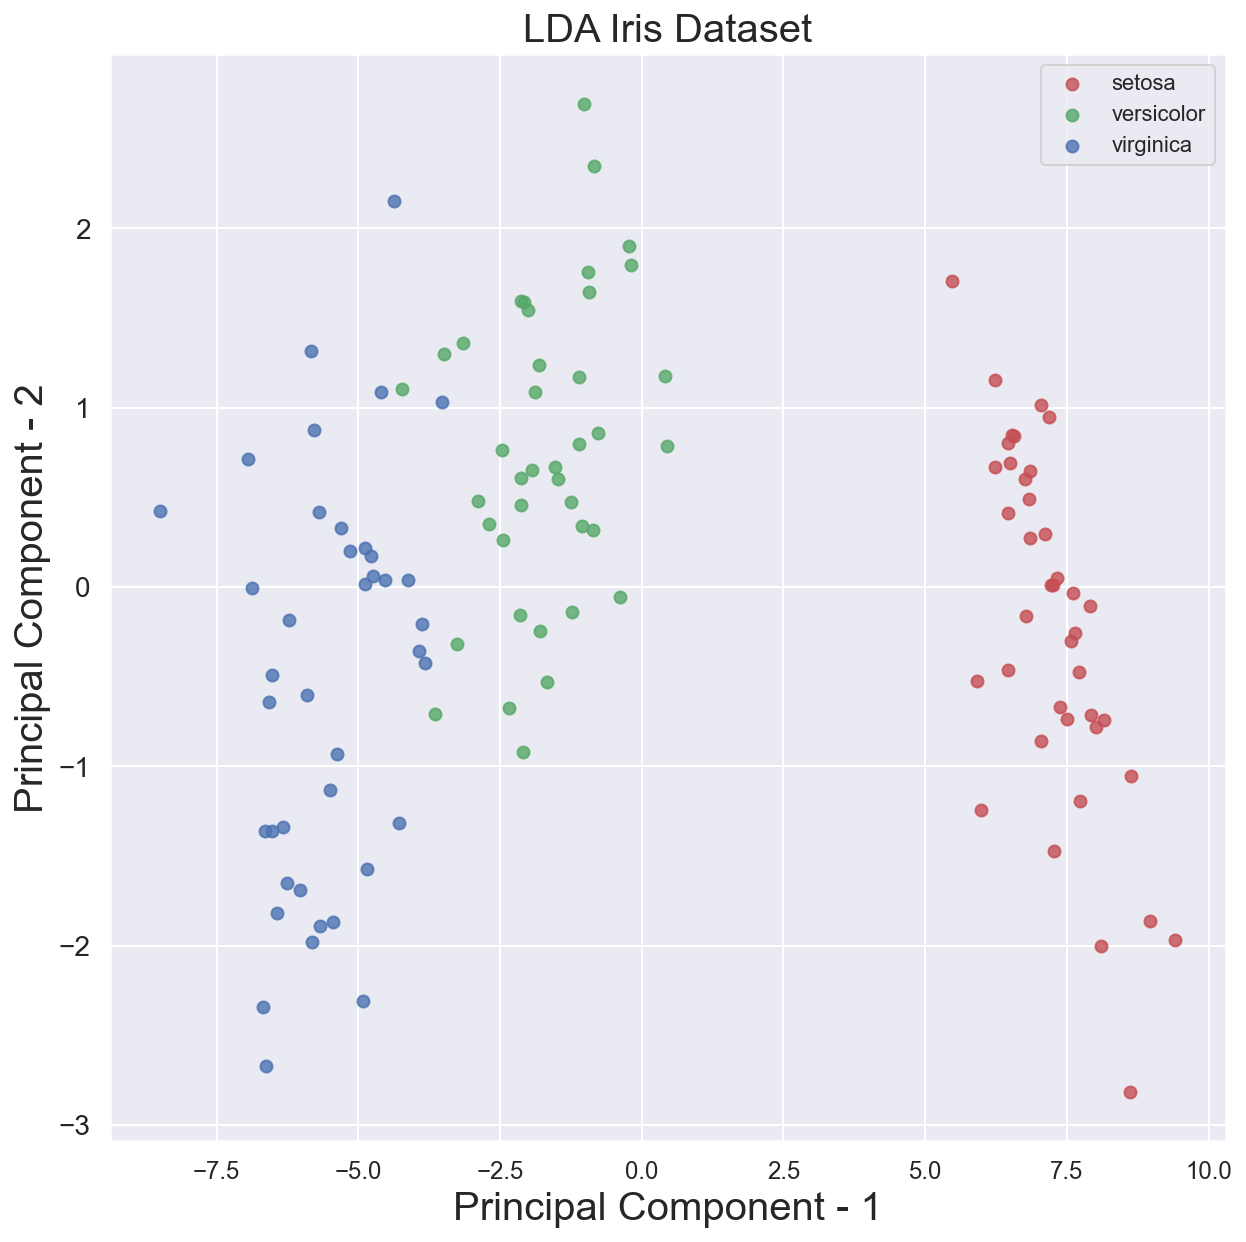

In [91]:
# take a look at the new axes for the data and plot them
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("LDA Iris Dataset",fontsize=20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']

for color, i, target_name in zip(colors, [0, 1, 2], targets):
    plt.scatter(X_train_lda[y_train == i, 0], 
                X_train_lda[y_train == i, 1], alpha=.8, color=color, label=target_name)

plt.legend(loc='best')
plt.show()

In [117]:
# what about the variability?
explained_variance_ratio = lda.explained_variance_ratio_
explained_variance_ratio*100

array([99.1212605,  0.8787395])

In [115]:
# Run a Random Forest Classifier with the transformed data
rfc = RandomForestClassifier(random_state=0, max_depth=5)
iris_rfc = rfc.fit(X_train_scaled, y_train).score(X_train_scaled, y_train)
iris_rfc*100

# iris_rfc = rfc.fit(X_train_scaled, y_train).predict(X_train_scaled)
# (y_train == iris_rfc).mean()*100

100.0

In [2]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?

In [116]:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1] # 150,4
        class_labels = np.unique(y)

        # S_W, S_B
        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features, n_features)) # (4, 4)
        S_B = np.zeros((n_features, n_features)) # (4, 4)
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * (mean_diff).dot(mean_diff.T)

        A = np.linalg.inv(S_W).dot(S_B)
        eigen_values, eigen_vestors = np.linalg.eig(A)
        eigen_vestors = eigen_vestors.T
        indeces = np.argsort(abs(eigen_values))[::-1]
        eigen_values = eigen_values[indeces]
        eigen_vestors = eigen_vestors[indeces]
        self.linear_discriminants = eigen_vestors[0:self.n_components]

    def transform(self, X):
        # project our data 
        return np.dot(X, self.linear_discriminants.T)